In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.linalg import norm

In [103]:
dataIris = datasets.load_iris()
#create a DataFrame
dfI = pd.DataFrame(dataIris.data, columns=dataIris.feature_names)
dfI['Target'] = pd.DataFrame(dataIris.target)
print(dfI.shape)
dfI.head()
dfI

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


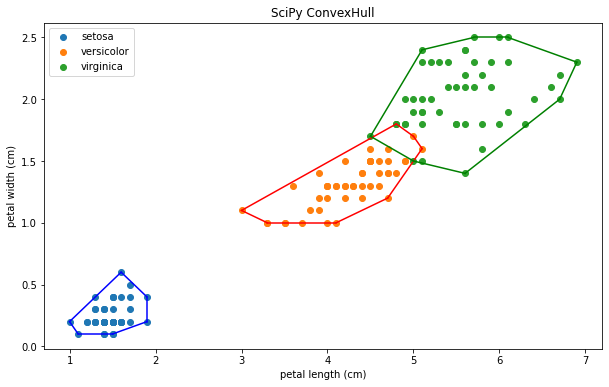

In [104]:
#visualisasi hasil ConvexHull SciPy
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('SciPy ConvexHull')
plt.xlabel(dataIris.feature_names[2])
plt.ylabel(dataIris.feature_names[3])
for i in range(len(dataIris.target_names)):
    bucket = dfI[dfI['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataIris.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

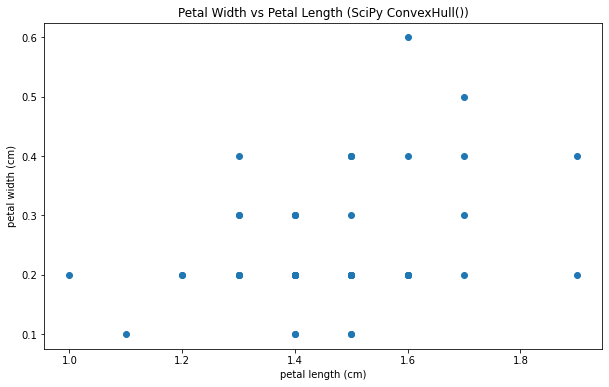

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [106]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length (SciPy ConvexHull())')
plt.xlabel(dataIris.feature_names[2])
plt.ylabel(dataIris.feature_names[3])
petals = dfI[dfI['Target'] == 0]
petals = petals.iloc[:,[2,3]].values
plt.scatter(petals[:, 0], petals[:, 1])
plt.show()
print(petals)

In [107]:
def isAbove(p1, p2, p3):
    return ((p1[1]*p2[2])+(p3[1]*p1[2])+(p2[1]*p3[2])-(p3[1]*p2[2])-(p2[1]*p1[2])-(p1[1]*p3[2])) > 0

def distanceFromLine(point, line1, line2):
    p1 = np.array(line1[1:])
    p2 = np.array(line2[1:])
    p3 = np.array(point[1:])
    return np.abs(np.cross(p2-p1, p1-p3)) / norm(p2-p1)

def getFarthestPoint(points, leftmost, rightmost):
    return max(points, key=lambda point: distanceFromLine(point, leftmost, rightmost))

def makeHull(hull, points, leftmost, rightmost):
    if len(points) == 0:
        hull.append([int(leftmost[0]), int(rightmost[0])])
    else:
        farthest = getFarthestPoint(points, leftmost, rightmost)
        points = points[points[:,0] != farthest[0]]
        if (points.shape[0] == 0):
            left = []
            right = []
        else:
            left_mask = np.array([isAbove(leftmost, farthest, point) for point in points])
            right_mask = np.array([isAbove(farthest, rightmost, point) for point in points])
            left = points[left_mask]
            right = points[right_mask]
        makeHull(hull, left, leftmost, farthest)
        makeHull(hull, right, farthest, rightmost)

def myConvexHull(data):
    # Add index column to numpy array data
    data = np.insert(data, 0, np.arange(len(data)), axis=1)
    sort = data[np.argsort(data[:,2])]
    sort = sort[np.argsort(sort[:,1], kind='stable')]
    leftmost = sort[0]
    rightmost = sort[-1]
    sort = sort[1:-1]

    hull = []

    above_mask = np.array([isAbove(leftmost, rightmost, sort[i]) for i in range(len(sort))])
    below_mask = np.array([isAbove(rightmost, leftmost, sort[i]) for i in range(len(sort))])
    above = sort[above_mask]
    below = sort[below_mask]
    makeHull(hull, above, leftmost, rightmost)
    makeHull(hull, below, rightmost, leftmost)
    return hull

print(myConvexHull(petals))

[[22, 43], [43, 44], [44, 24], [24, 32], [32, 13], [13, 22]]


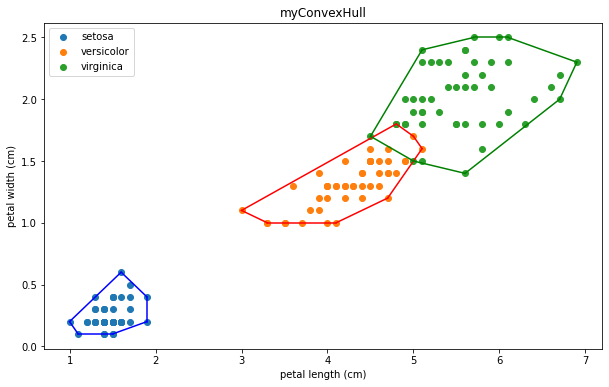

In [108]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('myConvexHull')
plt.xlabel(dataIris.feature_names[2])
plt.ylabel(dataIris.feature_names[3])
for i in range(len(dataIris.target_names)):
    bucket = dfI[dfI['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataIris.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

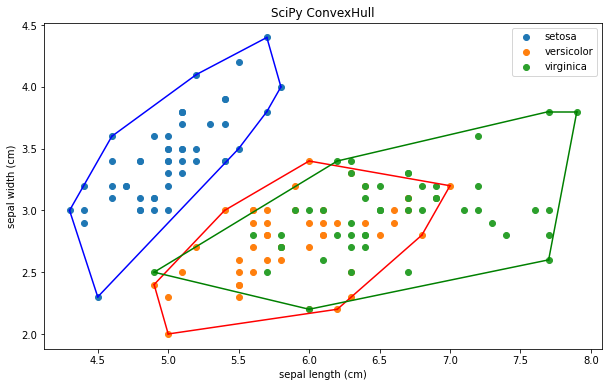

In [109]:
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('SciPy ConvexHull')
plt.xlabel(dataIris.feature_names[0])
plt.ylabel(dataIris.feature_names[1])
for i in range(len(dataIris.target_names)):
    bucket = dfI[dfI['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataIris.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

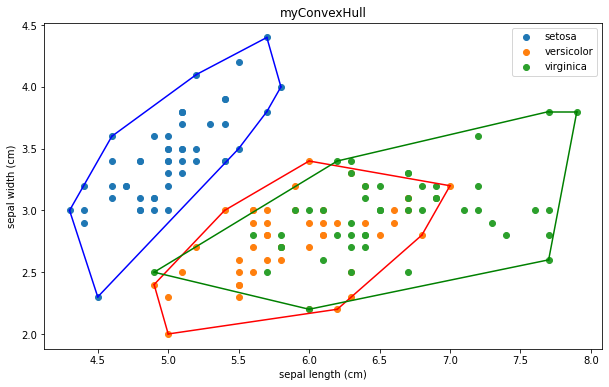

In [110]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('myConvexHull')
plt.xlabel(dataIris.feature_names[0])
plt.ylabel(dataIris.feature_names[1])
for i in range(len(dataIris.target_names)):
    bucket = dfI[dfI['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataIris.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [112]:
dataWine = datasets.load_wine()
#create a DataFrame
dfW = pd.DataFrame(dataWine.data, columns=dataWine.feature_names)
dfW['Target'] = pd.DataFrame(dataWine.target)
print(dfW.shape)
dfW.head()
dfW

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


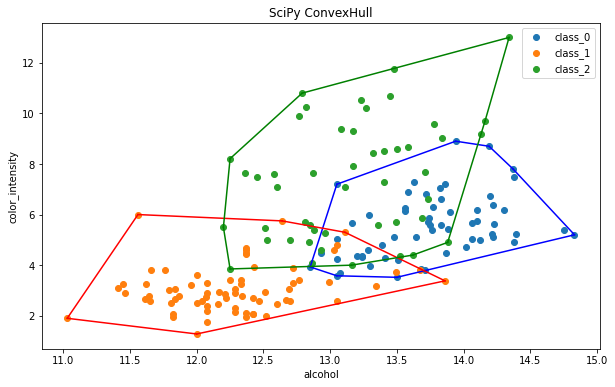

In [113]:
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('SciPy ConvexHull')
plt.xlabel(dataWine.feature_names[0])
plt.ylabel(dataWine.feature_names[9])
for i in range(len(dataWine.target_names)):
    bucket = dfW[dfW['Target'] == i]
    bucket = bucket.iloc[:,[0,9]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

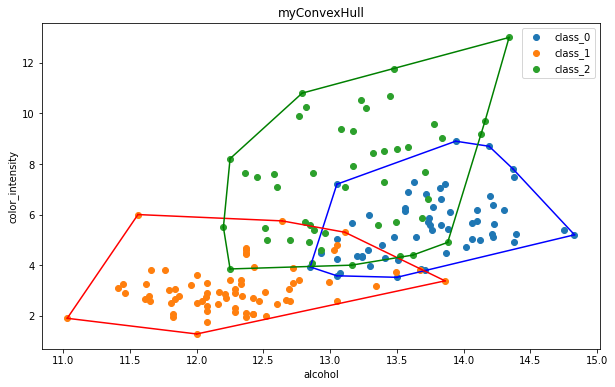

In [114]:
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('myConvexHull')
plt.xlabel(dataWine.feature_names[0])
plt.ylabel(dataWine.feature_names[9])
for i in range(len(dataWine.target_names)):
    bucket = dfW[dfW['Target'] == i]
    bucket = bucket.iloc[:,[0,9]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()